In [15]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose


In [16]:
df = pd.read_csv('./Net_generation_for_all_sectors.csv', skiprows=4)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 96 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   description  22 non-null     object 
 1   units        20 non-null     object 
 2   source key   21 non-null     object 
 3   Jan 2018     19 non-null     float64
 4   Feb 2018     19 non-null     float64
 5   Mar 2018     19 non-null     float64
 6   Apr 2018     19 non-null     float64
 7   May 2018     19 non-null     float64
 8   Jun 2018     19 non-null     float64
 9   Jul 2018     19 non-null     float64
 10  Aug 2018     19 non-null     float64
 11  Sep 2018     19 non-null     float64
 12  Oct 2018     19 non-null     float64
 13  Nov 2018     19 non-null     float64
 14  Dec 2018     19 non-null     float64
 15  Jan 2019     19 non-null     float64
 16  Feb 2019     19 non-null     float64
 17  Mar 2019     19 non-null     float64
 18  Apr 2019     19 non-null     float64
 19  May 2019  

In [18]:
df.head()

,description,units,source key,Jan 2018,Feb 2018,Mar 2018,Apr 2018,May 2018,Jun 2018,Jul 2018,...,Dec 2024,Jan 2025,Feb 2025,Mar 2025,Apr 2025,May 2025,Jun 2025,Jul 2025,Aug 2025,Sep 2025
0,Net generation for all sectors,thousand megawatthours,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,United States,NaN,ELEC.GEN..M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,United States : all fuels (utility-scale),thousand megawatthours,ELEC.GEN.ALL-US-99.M,373379.0,307058.0,321765.0,301057.0,339228.0,372145.0,411617.0,...,361292.0,402368.0,338379.0,333731.0,320412.0,343861.0,392998.0,446057.0,419759.0,368147.0
3,United States : coal,thousand megawatthours,ELEC.GEN.COW-US-99.M,119284.0,82050.0,80626.0,73346.0,85227.0,101503.0,115376.0,...,62800.0,83153.0,62306.0,49215.0,45526.0,48778.0,64502.0,80260.0,69728.0,58427.0
4,United States : petroleum liquids,thousand megawatthours,ELEC.GEN.PEL-US-99.M,5555.0,804.0,830.0,872.0,1040.0,1066.0,988.0,...,1224.0,2751.0,1182.0,857.0,856.0,764.0,1115.0,1107.0,1018.0,918.0


In [19]:
df.isnull().sum()

description    0
units          2
source key     1
Jan 2018       3
Feb 2018       3
              ..
May 2025       3
Jun 2025       3
Jul 2025       3
Aug 2025       3
Sep 2025       3
Length: 96, dtype: int64

In [20]:
df.describe(include="all")


,description,units,source key,Jan 2018,Feb 2018,Mar 2018,Apr 2018,May 2018,Jun 2018,Jul 2018,...,Dec 2024,Jan 2025,Feb 2025,Mar 2025,Apr 2025,May 2025,Jun 2025,Jul 2025,Aug 2025,Sep 2025
count,22,20,21,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,...,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
unique,21,1,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,United States : all utility-scale solar,thousand megawatthours,ELEC.GEN.SUN-US-99.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,20,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,40112.526316,33178.421053,34941.052632,32870.315789,37013.684211,40548.894737,44659.789474,...,40092.421053,44757.842105,38152.894737,38612.894737,37639.368421,40493.210526,45907.210526,51700.473684,48694.368421,42789.578947
std,NaN,NaN,NaN,88899.199730,72763.848639,76105.434765,70870.526885,80257.559468,88582.542422,99581.940363,...,86095.856698,95422.286703,79854.299064,77659.803624,74432.554767,80584.731416,93006.365162,106982.040477,100859.827924,88351.506660
min,NaN,NaN,NaN,-547.000000,-315.000000,-490.000000,-377.000000,-390.000000,-433.000000,-644.000000,...,-481.000000,-467.000000,-410.000000,-399.000000,-259.000000,-271.000000,-420.000000,-486.000000,-568.000000,-457.000000
25%,NaN,NaN,NaN,1480.000000,1183.000000,1262.500000,1143.500000,1275.000000,1202.000000,1271.000000,...,1231.000000,1322.000000,1173.500000,1052.500000,1017.000000,981.000000,1160.500000,1169.000000,1108.500000,1050.000000
50%,NaN,NaN,NaN,3686.000000,3896.000000,5056.000000,4828.000000,5083.000000,5191.000000,5499.000000,...,4984.000000,5397.000000,5806.000000,7961.000000,8758.000000,9309.000000,9425.000000,9858.000000,9319.000000,8465.000000
75%,NaN,NaN,NaN,25331.500000,24045.500000,26162.500000,27273.000000,27198.500000,26150.000000,20773.500000,...,29530.000000,32520.500000,30792.000000,40169.000000,40477.000000,37906.500000,38478.000000,38103.000000,36160.500000,32189.000000


In [21]:
df = df.set_index("description")


In [22]:
df = df.drop(columns=["units", "source key"], errors="ignore")


In [23]:
df_t = df.T


In [24]:
df_t.index = pd.to_datetime(df_t.index, format="%b %Y")
df_t = df_t.sort_index()


In [25]:
fuel_mix = df_t.div(df_t.sum(axis=1), axis=0)


In [26]:
df_t.isna().sum().sort_values(ascending=False).head()


description
Net generation for all sectors               93
United States                                93
United States : other renewables             93
United States : all fuels (utility-scale)     0
United States : petroleum liquids             0
dtype: int64

First:
Net generation for all sectors, United States, and United States : other renewables each have 93 missing values. That almost certainly means those rows span a longer date range than the rest of the table, or the table was stitched from multiple EIA series with different coverage windows.

Second:
United States : all fuels (utility-scale) and petroleum liquids have zero missing values. These are your anchor series — fully populated, continuous, trustworthy.

Third (the uncomfortable one):
This dataset is not symmetric across fuels. That’s normal for EIA data, but it means careless plotting will give you empty graphs.


Unsupervised learning requires aligned vectors. We must restrict the dataset to periods where most series exist.


In [27]:
# Count non-null values per column
valid_counts = df_t.notna().sum()

# We keep columns that exist for at least 80% of time periods
threshold = int(0.8 * len(df_t))
keep_cols = valid_counts[valid_counts >= threshold].index

df_clean = df_t[keep_cols]


In [28]:
X = df_clean.T


<Axes: title={'center': 'Total Generation Across Retained Fuels'}, xlabel='description'>

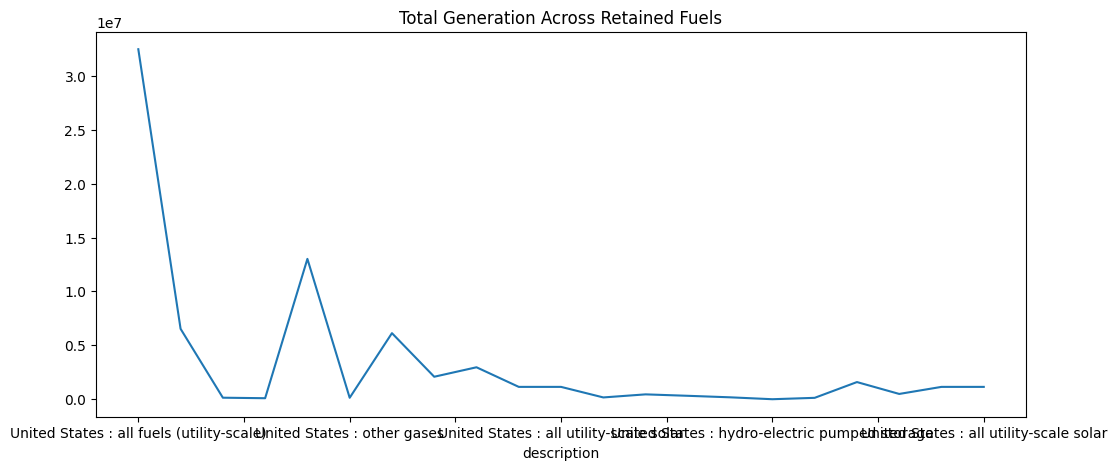

In [29]:
X.sum(axis=1).plot(figsize=(12,5), title="Total Generation Across Retained Fuels")


Critical for Unsupervised Models

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


<Axes: xlabel='description'>

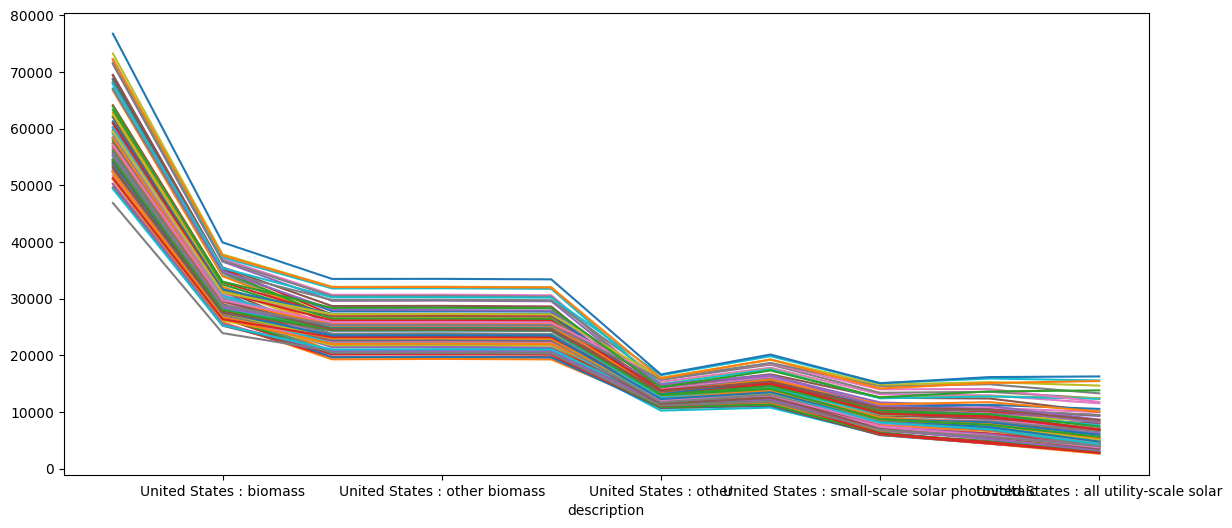

In [31]:
X.rolling(12).mean().plot(figsize=(14,6), legend=False)


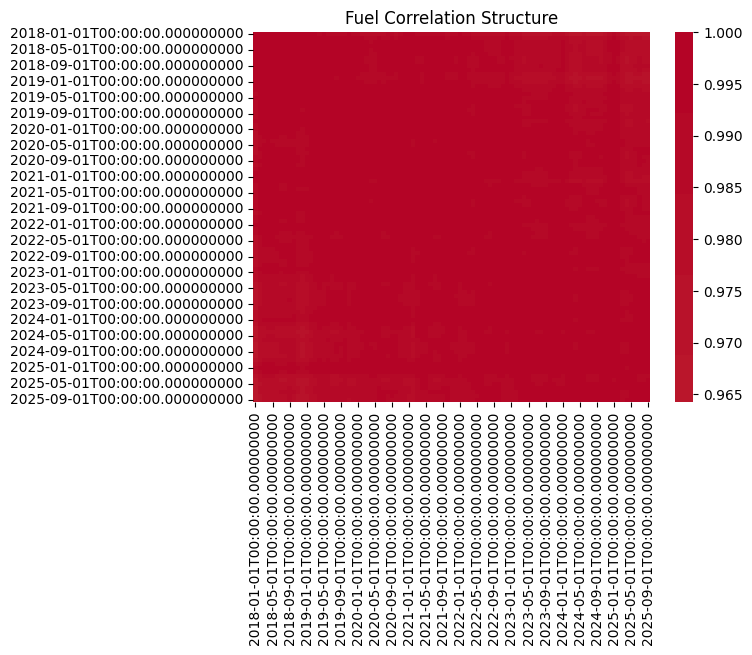

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(X.corr(), cmap="coolwarm", center=0)
plt.title("Fuel Correlation Structure")
plt.show()


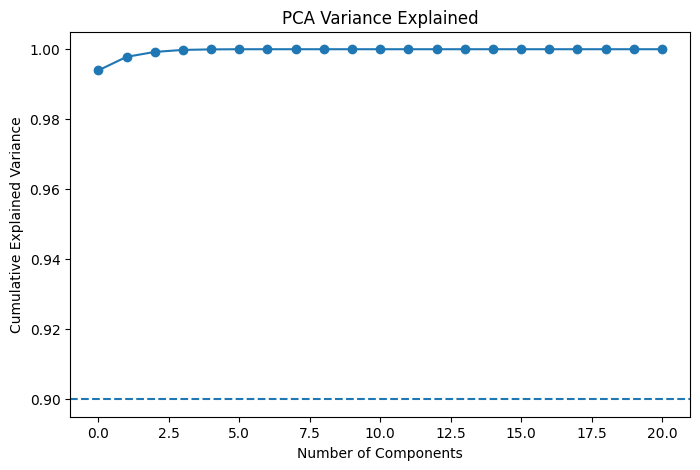

In [33]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8,5))
plt.plot(explained, marker="o")
plt.axhline(0.9, linestyle="--")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Variance Explained")
plt.show()
